In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/postings.csv')
df.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [ ]:
df.isnull().sum()

,0
job_id,0
company_name,1719
title,0
description,7
max_salary,94056
pay_period,87776
location,0
company_id,1717
views,1689
med_salary,117569


# **Preprocessing the dataset**

In [ ]:
df = df[~df['description'].isnull()]

In [ ]:
df.shape

(123842, 31)

In [ ]:
# removing the descriptions
df.drop_duplicates(subset=['description'],inplace=True)
df.shape

/tmp/ipython-input-60-1077595473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['description'],inplace=True)


(107827, 31)

In [ ]:
df.shape

(107827, 31)

In [ ]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips'],
      dtype='object')

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=fa4a63fb2ee74828f466ceefc89b94b88729389c7e7620796f3f74341b83094a
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
# the descriptions are in other languages other than english
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

df['language'] = df['description'].apply(detect_language)

/tmp/ipython-input-74-451493072.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = df['description'].apply(detect_language)


In [ ]:
df['language'].value_counts()

,count
language,
en,107614
es,98
fr,43
de,19
nl,12
it,8
pt,6
unknown,5
sv,4


In [ ]:
# consider only the english language
df = df[df['language'] == 'en']
df.shape

(107614, 32)

In [ ]:
df['words'] = df['description'].apply(lambda x: len(x.split()))
df.head()

/tmp/ipython-input-77-3092115697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words'] = df['description'].apply(lambda x: len(x.split()))


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips,language,words
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,en,358
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0,en,492
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,en,66
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0,en,209
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0,en,36


In [ ]:
df['words'].describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,words
count,107614.000000
mean,520.511653
std,305.921577
min,1.000000
25%,291.250000
50%,474.000000
75%,695.000000
90%,926.000000
95%,1076.000000
99%,1410.870000


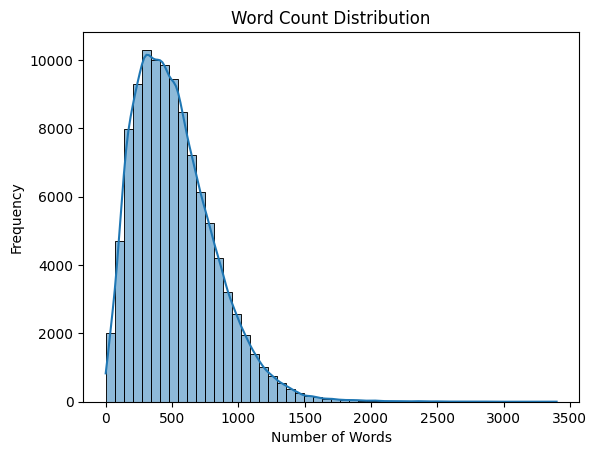

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['words'], bins=50, kde=True)
plt.title("Word Count Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [ ]:
'''
remove the description whose no of words are
greater than 3000 and less than 50
'''
df = df[(df['words'] > 50) & (df['words'] < 3000)]
df.shape

(106387, 33)

In [ ]:
import re

# perform text processing on description
def text_processing(text):
    # Separate camelCase and camelCase-like terms (e.g., jobDescription -> job Description)
    text = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', text)

    # Remove "job description", "jobdescription", "job summary", etc.
    text = re.sub(r'job\s?(description|summary|details|role|responsibilities|profile)?', '', text, flags=re.IGNORECASE)

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation marks
    text = re.sub(r'[^\w\s]', '', text)

    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove digits
    text = re.sub(r'\d', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply to your dataframe
df['description'] = df['description'].apply(text_processing)

/tmp/ipython-input-84-235921364.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].apply(text_processing)


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 9.3 MB/s eta 0:00:00


In [ ]:
# some of the titles contain emojies so remove those emojies
import re
import emoji

# remove emojis
def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')

df['description'] = df['description'].apply(remove_emojis)
df['title'] = df['title'].apply(remove_emojis)

/tmp/ipython-input-86-4211482045.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].apply(remove_emojis)
/tmp/ipython-input-86-4211482045.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].apply(remove_emojis)


In [ ]:
df['id'] = df.index

In [ ]:
# there are some titles in numeric format remove those
titles_to_be_removed = ['200052','200052','24-05437','![']
for title in titles_to_be_removed:
  df = df[df['title'] != title]
df.shape

(106383, 34)

In [ ]:
# save the dataset into drive
df.to_csv('/content/drive/MyDrive/postings_processed.csv',index=False)

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/postings_processed.csv')
df.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips,language,words,id
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,a leading real estate firm in new jersey is se...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,en,358,0
1,1829192,NaN,Mental Health Therapist/Counselor,at aspen therapy and wellness we are committed...,50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0,en,492,1
2,10998357,The National Exemplar,Assitant Restaurant Manager,the national exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,en,66,2
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,senior associate attorney elder law trusts and...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0,en,209,3
4,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,the economic development planning intern will ...,20.0,HOURLY,"Raleigh, NC",1481176.0,9.0,NaN,...,0,INTERNSHIP,USD,BASE_SALARY,35360.0,27601.0,37183.0,en,578,5


In [ ]:
df.isnull().sum()

,0
job_id,0
company_name,1485
title,0
description,0
max_salary,78515
pay_period,72826
location,0
company_id,1483
views,1336
med_salary,100694


In [ ]:
# change the id column
df['id'] = range(df.shape[0])

# drop the columns like language, words
df.drop(columns=['language','words'],inplace=True)

In [ ]:
# job_id to id mapping
import pickle
job_id_to_id_mapping = dict(zip(df['job_id'],df['id']))
pickle.dump(job_id_to_id_mapping,open('/content/drive/MyDrive/job_id_to_id_mapping.pkl','wb'))

In [ ]:
# check the views and applies data
views_data = df[~df['views'].isnull()]
non_views_data = df[df['views'].isnull()]
views_data.shape, non_views_data.shape

((105047, 32), (1336, 32))

In [ ]:
applies_data = df[~df['applies'].isnull()]
non_applies_data = df[df['applies'].isnull()]
applies_data.shape, non_applies_data.shape

((21666, 32), (84717, 32))

In [ ]:
views_data['views'].describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,views
count,105047.000000
mean,15.768437
std,92.065638
min,1.000000
25%,3.000000
50%,4.000000
75%,8.000000
90%,26.000000
95%,52.000000
99%,190.540000


In [ ]:
applies_data['applies'].describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,applies
count,21666.000000
mean,10.850872
std,29.750906
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
90%,24.000000
95%,46.000000
99%,141.000000


In [ ]:
# get the data where user have viewed and applied it
show_applies_data = applies_data[['job_id','id','company_id','company_name','title','description','applies','views']]
show_views_data = views_data[['job_id','id','company_id','company_name','title','description','applies','views']]

# merge both the dataset on jobid
merged = pd.merge(show_applies_data,show_views_data,on='job_id')
merged

,job_id,id_x,company_id_x,company_name_x,title_x,description_x,applies_x,views_x,id_y,company_id_y,company_name_y,title_y,description_y,applies_y,views_y
0,921716,0,2774458.0,Corcoran Sawyer Smith,Marketing Coordinator,a leading real estate firm in new jersey is se...,2.0,20.0,0,2774458.0,Corcoran Sawyer Smith,Marketing Coordinator,a leading real estate firm in new jersey is se...,2.0,20.0
1,91700727,4,1481176.0,Downtown Raleigh Alliance,Economic Development and Planning Intern,the economic development planning intern will ...,4.0,9.0,4,1481176.0,Downtown Raleigh Alliance,Economic Development and Planning Intern,the economic development planning intern will ...,4.0,9.0
2,103254301,5,81942316.0,Raw Cereal,Producer,company description raw cereal is a creative d...,1.0,7.0,5,81942316.0,Raw Cereal,Producer,company description raw cereal is a creative d...,1.0,7.0
3,9615617,9,1194336.0,"Glastender, Inc.",Inside Customer Service Associate,glastender inc is a familyowned manufacturer o...,1.0,4.0,9,1194336.0,"Glastender, Inc.",Inside Customer Service Associate,glastender inc is a familyowned manufacturer o...,1.0,4.0
4,111513530,17,4028816.0,United Methodists of Greater New Jersey,"Content Writer, Communications",application opening date april title content w...,1.0,10.0,17,4028816.0,United Methodists of Greater New Jersey,"Content Writer, Communications",application opening date april title content w...,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21661,3906256695,105754,6452409.0,Legal.io,Data Privacy Analyst,our client a major gaming company is seeking a...,1.0,3.0,105754,6452409.0,Legal.io,Data Privacy Analyst,our client a major gaming company is seeking a...,1.0,3.0
21662,3906258772,106041,41771.0,"Akraya, Inc.",Pricing Operations Analyst: 24-01067,primary skills operations strategy project pla...,1.0,5.0,106041,41771.0,"Akraya, Inc.",Pricing Operations Analyst: 24-01067,primary skills operations strategy project pla...,1.0,5.0
21663,3906259147,106075,336165.0,Advantis Global is becoming INSPYR Solutions,Data Engineer II,about this featured opportunity we are looking...,1.0,5.0,106075,336165.0,Advantis Global is becoming INSPYR Solutions,Data Engineer II,about this featured opportunity we are looking...,1.0,5.0
21664,3906259740,106167,43325.0,Solugenix,IT Support Technician,it support technician hr onsite days in monteb...,1.0,4.0,106167,43325.0,Solugenix,IT Support Technician,it support technician hr onsite days in monteb...,1.0,4.0


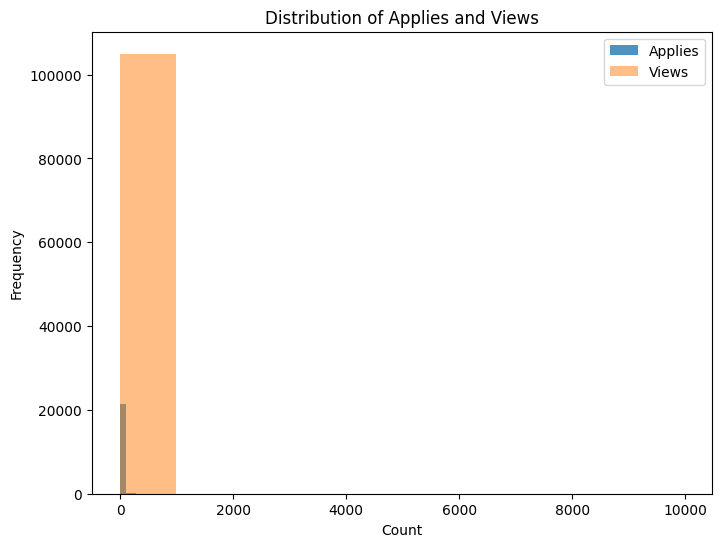

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot both on the same axes
show_applies_data['applies'].plot(kind='hist', alpha=0.8, label='Applies')
show_views_data['views'].plot(kind='hist', alpha=0.5, label='Views')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Applies and Views')
plt.legend()

plt.show()

In [ ]:
only_viewed = show_views_data[show_views_data['applies'].isnull()]

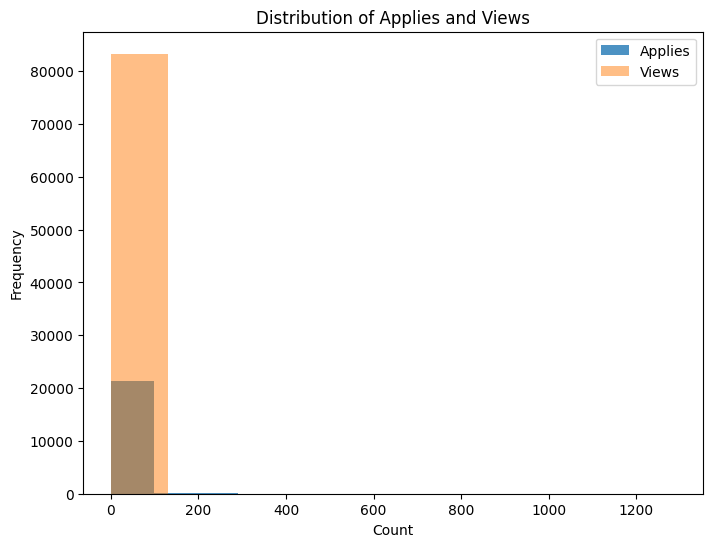

In [ ]:
plt.figure(figsize=(8, 6))

# Plot both on the same axes
show_applies_data['applies'].plot(kind='hist', alpha=0.8, label='Applies')
only_viewed['views'].plot(kind='hist', alpha=0.5, label='Views')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Applies and Views')
plt.legend()

plt.show()

In [ ]:
only_viewed[only_viewed['views']==0]

,job_id,id,company_id,company_name,title,description,applies,views,industry


In [ ]:
industry_df = pd.read_csv('/content/drive/MyDrive/company_industries.csv')
industry_df.head()

,company_id,industry
0,391906,Book and Periodical Publishing
1,22292832,Construction
2,20300,Banking
3,3570660,Book and Periodical Publishing
4,878353,Staffing and Recruiting


In [ ]:
mapping = dict(zip(industry_df['company_id'],industry_df['industry']))
mapping

{391906: 'Book and Periodical Publishing',
 22292832: 'Construction',
 20300: 'Banking',
 3570660: 'Book and Periodical Publishing',
 878353: 'Staffing and Recruiting',
 729238: 'IT Services and IT Consulting',
 766849: 'Staffing and Recruiting',
 12828: 'Food and Beverage Services',
 2934678: 'IT Services and IT Consulting',
 15984730: 'IT Services and IT Consulting',
 34771607: 'Financial Services',
 947812: 'Mining',
 6618000: 'IT Services and IT Consulting',
 5887: 'Staffing and Recruiting',
 34214892: 'E-Learning Providers',
 16239240: 'Truck Transportation',
 75056372: 'IT Services and IT Consulting',
 23656: 'Staffing and Recruiting',
 33218: 'Staffing and Recruiting',
 1712844: 'Real Estate',
 11056: 'Staffing and Recruiting',
 24440: 'IT Services and IT Consulting',
 4592: 'Industrial Machinery Manufacturing',
 33671: 'Food and Beverage Manufacturing',
 11676886: 'Business Consulting and Services',
 7164053: 'Banking',
 14158: 'Staffing and Recruiting',
 366025: 'Truck Transpo

In [ ]:
show_applies_data.isnull().sum()

,0
job_id,0
id,0
company_id,1483
company_name,1485
title,0
description,0
applies,0
views,0
industry,1620


In [ ]:
show_applies_data['industry'] = show_applies_data['company_id'].map(mapping)
show_applies_data

/tmp/ipython-input-1309665440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_applies_data['industry'] = show_applies_data['company_id'].map(mapping)


,job_id,id,company_id,company_name,title,description,applies,views,industry
0,921716,0,2774458.0,Corcoran Sawyer Smith,Marketing Coordinator,a leading real estate firm in new jersey is se...,2.0,20.0,Real Estate
4,91700727,4,1481176.0,Downtown Raleigh Alliance,Economic Development and Planning Intern,the economic development planning intern will ...,4.0,9.0,Non-profit Organizations
5,103254301,5,81942316.0,Raw Cereal,Producer,company description raw cereal is a creative d...,1.0,7.0,Design Services
9,9615617,9,1194336.0,"Glastender, Inc.",Inside Customer Service Associate,glastender inc is a familyowned manufacturer o...,1.0,4.0,Food and Beverage Services
17,111513530,17,4028816.0,United Methodists of Greater New Jersey,"Content Writer, Communications",application opening date april title content w...,1.0,10.0,Religious Institutions
...,...,...,...,...,...,...,...,...,...
105754,3906256695,105754,6452409.0,Legal.io,Data Privacy Analyst,our client a major gaming company is seeking a...,1.0,3.0,Law Practice
106041,3906258772,106041,41771.0,"Akraya, Inc.",Pricing Operations Analyst: 24-01067,primary skills operations strategy project pla...,1.0,5.0,Staffing and Recruiting
106075,3906259147,106075,336165.0,Advantis Global is becoming INSPYR Solutions,Data Engineer II,about this featured opportunity we are looking...,1.0,5.0,Staffing and Recruiting
106167,3906259740,106167,43325.0,Solugenix,IT Support Technician,it support technician hr onsite days in monteb...,1.0,4.0,IT Services and IT Consulting


In [ ]:
show_views_data['industry'] = show_views_data['company_id'].map(mapping)
show_views_data

/tmp/ipython-input-3966232968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_views_data['industry'] = show_views_data['company_id'].map(mapping)


,job_id,id,company_id,company_name,title,description,applies,views,industry
0,921716,0,2774458.0,Corcoran Sawyer Smith,Marketing Coordinator,a leading real estate firm in new jersey is se...,2.0,20.0,Real Estate
1,1829192,1,NaN,NaN,Mental Health Therapist/Counselor,at aspen therapy and wellness we are committed...,NaN,1.0,NaN
2,10998357,2,64896719.0,The National Exemplar,Assitant Restaurant Manager,the national exemplar is accepting application...,NaN,8.0,Restaurants
3,23221523,3,766262.0,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,senior associate attorney elder law trusts and...,NaN,16.0,Law Practice
4,91700727,4,1481176.0,Downtown Raleigh Alliance,Economic Development and Planning Intern,the economic development planning intern will ...,4.0,9.0,Non-profit Organizations
...,...,...,...,...,...,...,...,...,...
106378,3906267117,106378,56120.0,Lozano Smith,Title IX/Investigations Attorney,our walnut creek office is currently seeking a...,NaN,1.0,Law Practice
106379,3906267126,106379,1124131.0,Pinterest,"Staff Software Engineer, ML Serving Platform",about pinterest millions of people across the ...,NaN,3.0,Software Development
106380,3906267131,106380,90552133.0,EPS Learning,"Account Executive, Oregon/Washington",company overview eps learning is a leading k s...,NaN,3.0,Education Administration Programs
106381,3906267195,106381,2793699.0,Trelleborg Applied Technologies,Business Development Manager,the business development manager is a hunter t...,NaN,4.0,Industrial Machinery Manufacturing


In [ ]:
import zipfile
import os
from collections import defaultdict

zip_path = "/content/drive/MyDrive/archive (2).zip"
extract_path = "/content/resumes/data/data/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

domain_counts = {}

for folder_name in os.listdir(extract_path):
    folder_path = os.path.join(extract_path, folder_name)
    if os.path.isdir(folder_path):
        count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        domain_counts[folder_name.upper()] = count

In [ ]:
domain_counts

{'SALES': 116,
 'ENGINEERING': 118,
 'BANKING': 115,
 'HR': 110,
 'DATA': 0,
 'AVIATION': 117,
 'FITNESS': 117,
 'AGRICULTURE': 63,
 'ADVOCATE': 118,
 'ARTS': 103,
 'BUSINESS-DEVELOPMENT': 120,
 'CONSTRUCTION': 112,
 'PUBLIC-RELATIONS': 111,
 'APPAREL': 97,
 'CONSULTANT': 115,
 'ACCOUNTANT': 115,
 'TEACHER': 102,
 'INFORMATION-TECHNOLOGY': 120,
 'DESIGNER': 107,
 'HEALTHCARE': 115,
 'RESUME': 1,
 'DIGITAL-MEDIA': 96,
 'AUTOMOBILE': 36,
 'BPO': 22,
 'CHEF': 118,
 'FINANCE': 118}

In [ ]:
del domain_counts['RESUME']

In [ ]:
del domain_counts['DATA']

In [ ]:
domain_counts

{'SALES': 116,
 'ENGINEERING': 118,
 'BANKING': 115,
 'HR': 110,
 'AVIATION': 117,
 'FITNESS': 117,
 'AGRICULTURE': 63,
 'ADVOCATE': 118,
 'ARTS': 103,
 'BUSINESS-DEVELOPMENT': 120,
 'CONSTRUCTION': 112,
 'PUBLIC-RELATIONS': 111,
 'APPAREL': 97,
 'CONSULTANT': 115,
 'ACCOUNTANT': 115,
 'TEACHER': 102,
 'INFORMATION-TECHNOLOGY': 120,
 'DESIGNER': 107,
 'HEALTHCARE': 115,
 'DIGITAL-MEDIA': 96,
 'AUTOMOBILE': 36,
 'BPO': 22,
 'CHEF': 118,
 'FINANCE': 118}

In [ ]:
len(domain_counts)

24

In [ ]:
# save the dictionary in json
import json

with open('/content/drive/MyDrive/domain_counts.json', 'w') as json_file:
    json.dump(domain_counts, json_file)

In [ ]:
# load the json file
import json
with open('/content/drive/MyDrive/domain_counts.json', 'r') as json_file:
    domain_counts = json.load(json_file)

In [ ]:
user_to_job_domain_map = {
    'AGRICULTURE': ['Farming', 'Dairy Product Manufacturing', 'Food and Beverage Manufacturing'],
    'ARTS': ['Performing Arts', 'Artists and Writers', 'Media Production', 'Animation and Post-production'],
    'SALES': ['Retail', 'Retail Groceries', 'Retail Apparel and Fashion', 'Wholesale', 'Consumer Services'],
    'CONSULTANT': ['Business Consulting and Services', 'Strategic Management Services', 'Outsourcing and Offshoring Consulting'],
    'DIGITAL-MEDIA': ['Online Audio and Video Media', 'Broadcast Media Production and Distribution', 'Media Production'],
    'CHEF': ['Restaurants', 'Food and Beverage Services', 'Hospitality'],
    'HEALTHCARE': ['Hospitals and Health Care', 'Medical Practices', 'Mental Health Care', 'Pharmaceutical Manufacturing'],
    'PUBLIC-RELATIONS': ['Public Relations and Communications Services', 'Advertising Services', 'Events Services'],
    'AVIATION': ['Airlines and Aviation', 'Aviation and Aerospace Component Manufacturing'],
    'BANKING': ['Banking', 'Financial Services', 'Investment Banking', 'Investment Management'],
    'ACCOUNTANT': ['Accounting', 'Financial Services', 'Insurance'],
    'INFORMATION-TECHNOLOGY': ['Software Development', 'IT Services and IT Consulting', 'Technology, Information and Internet'],
    'HR': ['Human Resources Services', 'Staffing and Recruiting'],
    'CONSTRUCTION': ['Construction', 'Architecture and Planning', 'Civil Engineering'],
    'DESIGNER': ['Graphic Design', 'Design Services', 'Architecture and Planning'],
    'FINANCE': ['Financial Services', 'Investment Management', 'Investment Banking', 'Venture Capital and Private Equity Principals'],
    'FITNESS': ['Wellness and Fitness Services', 'Health and Wellness'],
    'BUSINESS-DEVELOPMENT': ['Business Consulting and Services', 'Strategic Management Services', 'Market Research'],
    'APPAREL': ['Retail Apparel and Fashion', 'Textile Manufacturing', 'Wholesale'],
    'ADVOCATE': ['Law Practice', 'Legal Services', 'Administration of Justice'],
    'BPO': ['Outsourcing and Offshoring Consulting', 'Customer Support', 'IT Services and IT Consulting'],
    'TEACHER': ['Primary and Secondary Education', 'E-Learning Providers', 'Higher Education'],
    'ENGINEERING': ['Civil Engineering', 'Software Development', 'Industrial Machinery Manufacturing', 'Semiconductor Manufacturing'],
    'AUTOMOBILE': ['Motor Vehicle Manufacturing', 'Transportation, Logistics, Supply Chain and Storage']
}

In [ ]:
user_to_negative_domains = {
 'AGRICULTURE': ['E-Learning Providers', 'Computer Games'],
 'ARTS': ['Banking', 'Law Enforcement'],
 'SALES': ['Pharmaceutical Manufacturing', 'Legal Services'],
 'CONSULTANT': ['Farming', 'Musicians'],
 'DIGITAL-MEDIA': ['Semiconductor Manufacturing', 'Oil and Gas'],
 'CHEF': ['Computer and Network Security', 'Strategic Management Services'],
 'HEALTHCARE': ['Real Estate', 'Retail Luxury Goods and Jewelry'],
 'PUBLIC-RELATIONS': ['Dairy Product Manufacturing', 'Computer Hardware Manufacturing'],
 'AVIATION': ['Libraries', 'Primary and Secondary Education'],
 'BANKING': ['Performing Arts', 'Food and Beverage Services'],
 'ACCOUNTANT': ['Photography', 'Entertainment Providers'],
 'INFORMATION-TECHNOLOGY': ['Tobacco Manufacturing', 'Religious Institutions'],
 'HR': ['Glass, Ceramics and Concrete Manufacturing', 'Transportation, Logistics, Supply Chain and Storage'],
 'CONSTRUCTION': ['Translation and Localization', 'Book and Periodical Publishing'],
 'DESIGNER': ['Banking', 'Pharmaceutical Manufacturing'],
 'FINANCE': ['Animation and Post-production', 'Museums, Historical Sites, and Zoos'],
 'FITNESS': ['Insurance', 'Mining'],
 'BUSINESS-DEVELOPMENT': ['Veterinary Services', 'Law Enforcement'],
 'APPAREL': ['Nanotechnology Research', 'Administration of Justice'],
 'ADVOCATE': ['Restaurant', 'Semiconductor Manufacturing'],
 'BPO': ['Aviation and Aerospace Component Manufacturing', 'Think Tanks'],
 'TEACHER': ['Real Estate', 'Venture Capital and Private Equity Principals'],
 'ENGINEERING': ['Musicians', 'Artists and Writers'],
 'AUTOMOBILE': ['Fundraising', 'Graphic Design']
}

In [ ]:
resume_df = pd.read_csv('/content/drive/MyDrive/Resume.csv')
resume_df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [ ]:
'''
for eg we have 5 jobs of agriculture so our
user_domain_mapping will be 1:agriculture
2:agriculture....
'''
user_domain_mapping = {}
user_id_counter = 0
for domain, count in domain_counts.items():
    for i in range(count):
        user_domain_mapping[user_id_counter] = domain
        user_id_counter += 1

In [ ]:
from string import punctuation
import re

# preprocess the resume of users
def resume_preprocess(text):
  # convert into lower text
  text = text.lower()

  # remove extra spaces
  text = re.sub(r'\s+', ' ', text).strip()

  # remove punctuation marks
  text = text.translate(str.maketrans('', '', punctuation))

  # remove special characters
  text = re.sub(r'[^a-zA-Z\s]', '', text)

  # remove the content in brackets
  text = re.sub(r'\([^)]*\)', '', text)

  # remove the content in square brackets
  text = re.sub(r'\[[^\]]*\]', '', text)

  return text

resume_df['Resume_str'] = resume_df['Resume_str'].apply(resume_preprocess)

In [ ]:
resume_df

,ID,Resume_str,Resume_html,Category
0,16852973,hr administratormarketing associate hr adminis...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,hr specialist us hr operations summary versati...,"<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,hr director summary over years experience in ...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,hr specialist summary dedicated driven and dyn...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,hr manager skill highlights hr skills hr depar...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,rank sgte non commissioned officer in charge b...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,government relations communications and organi...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,geek squad agent professional profile it suppo...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,program director office manager summary highl...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [ ]:
from sentence_transformers import SentenceTransformer
import torch
from tqdm import tqdm

# Always check available GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# Load small BGE model for embeddings
model = SentenceTransformer(
    "BAAI/bge-large-en",
    device=device
)

Using device: cuda


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [ ]:
# Extract lists
ids = resume_df['ID'].tolist()
resumes = resume_df['Resume_str'].tolist()

# Encode resumes in batches
batch_size = 8
resume_embed_dict = {}

for i in tqdm(range(0, len(resumes), batch_size), desc="Embedding resumes in batches"):
    batch_resumes = resumes[i:i+batch_size]
    batch_ids = ids[i:i+batch_size]

    # get the embeddings
    batch_embeddings = model.encode(batch_resumes, convert_to_numpy=True, show_progress_bar=False)

    # update the dictionary
    for resume_id, emb in zip(batch_ids, batch_embeddings):
        resume_embed_dict[resume_id] = emb

Embedding resumes in batches: 100%|██████████| 311/311 [03:51<00:00,  1.34it/s]


In [ ]:
from itertools import islice
model.half()

# Prepare data
job_ids = df['id'].tolist()
descriptions = df['description'].tolist()

# Batched processing function
def batched(iterable, n):
    iterator = iter(iterable)
    while batch := list(islice(iterator, n)):
        yield batch

# Process in optimized batches
batch_size = 256
job_embed_dict = {}

for batch_ids, batch_descriptions in tqdm(
    zip(batched(job_ids, batch_size), batched(descriptions, batch_size)),
    total=len(descriptions)//batch_size + 1,
    desc="Embedding jobs"
):
    batch_embeddings = model.encode(
        batch_descriptions,
        convert_to_numpy=True,
        show_progress_bar=False,
        device=device
    )
    job_embed_dict.update(zip(batch_ids, batch_embeddings))

Embedding jobs: 100%|██████████| 416/416 [34:37<00:00,  4.99s/it]


In [ ]:
# save the resume embeddings
import pickle
with open('/content/drive/MyDrive/resume_embed_dict.pkl', 'wb') as f:
    pickle.dump(resume_embed_dict, f)

In [ ]:
# save the job_embeddings
import pickle
with open('/content/drive/MyDrive/job_embed_dict.pkl', 'wb') as f:
    pickle.dump(job_embed_dict, f)

In [ ]:
# load the job embeddings
import pickle
with open('/content/drive/MyDrive/job_embed_dict.pkl', 'rb') as f:
    job_embed_dict = pickle.load(f)

In [ ]:
# load the resume embeddings
import pickle
with open('/content/drive/MyDrive/resume_embed_dict.pkl', 'rb') as f:
    resume_embed_dict = pickle.load(f)

In [ ]:
show_applies_data['industry'].value_counts()

,count
industry,
Staffing and Recruiting,4463
IT Services and IT Consulting,3832
Software Development,1697
Financial Services,988
Hospitals and Health Care,944
...,...
Recreational Facilities,1
Nanotechnology Research,1
Strategic Management Services,1


In [ ]:
resume_df.shape

(2484, 4)

In [ ]:
resume_df['Category'].value_counts()

,count
Category,
INFORMATION-TECHNOLOGY,120
BUSINESS-DEVELOPMENT,120
ADVOCATE,118
CHEF,118
ENGINEERING,118
ACCOUNTANT,118
FINANCE,118
FITNESS,117
AVIATION,117


In [ ]:
train_df_list = []
test_df_list = []

# Iterate through each unique domain
for domain in resume_df['Category'].unique():
    domain_df = resume_df[resume_df['Category'] == domain]

    # Shuffle the rows for randomness
    domain_df = domain_df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Compute 80% split index
    split_index = int(0.8 * len(domain_df))

    # Split into train and test
    train_df_list.append(domain_df.iloc[:split_index])
    test_df_list.append(domain_df.iloc[split_index:])

# Concatenate all domains
train_df = pd.concat(train_df_list, ignore_index=True)
test_df = pd.concat(test_df_list, ignore_index=True)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (1977, 4)
Test shape: (507, 4)


In [ ]:
train_df['Category'].value_counts()

,count
Category,
INFORMATION-TECHNOLOGY,96
BUSINESS-DEVELOPMENT,96
ADVOCATE,94
CHEF,94
ENGINEERING,94
ACCOUNTANT,94
FINANCE,94
FITNESS,93
AVIATION,93


In [ ]:
test_df['Category'].value_counts()

,count
Category,
INFORMATION-TECHNOLOGY,24
FITNESS,24
BUSINESS-DEVELOPMENT,24
ADVOCATE,24
ENGINEERING,24
CHEF,24
FINANCE,24
SALES,24
ACCOUNTANT,24


In [ ]:
# add job embeddings column to the show_applies_data
job_ids = show_applies_data['id']
job_embeddings = [job_embed_dict[job_id] for job_id in job_ids]
show_applies_data['job_embedding'] = job_embeddings

show_applies_data.head()

/tmp/ipython-input-1631826758.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_applies_data['job_embedding'] = job_embeddings


,job_id,id,company_id,company_name,title,description,applies,views,industry,job_embedding
0,921716,0,2774458.0,Corcoran Sawyer Smith,Marketing Coordinator,a leading real estate firm in new jersey is se...,2.0,20.0,Real Estate,"[0.027788777, -0.0012095295, -0.016464962, -0...."
4,91700727,5,1481176.0,Downtown Raleigh Alliance,Economic Development and Planning Intern,the economic development planning intern will ...,4.0,9.0,Non-profit Organizations,"[0.02835594, 0.062165093, 0.008481047, 0.02356..."
5,103254301,6,81942316.0,Raw Cereal,Producer,company description raw cereal is a creative d...,1.0,7.0,Design Services,"[0.048714828, 0.020684017, -0.026489235, -0.02..."
9,9615617,10,1194336.0,"Glastender, Inc.",Inside Customer Service Associate,glastender inc is a familyowned manufacturer o...,1.0,4.0,Food and Beverage Services,"[0.047290992, 0.0043167477, -0.020643508, 0.01..."
17,111513530,18,4028816.0,United Methodists of Greater New Jersey,"Content Writer, Communications",application opening date april title content w...,1.0,10.0,Religious Institutions,"[0.08087806, 0.028821701, 0.021725874, -0.0155..."


In [ ]:
sub_categories = user_to_job_domain_map['AGRICULTURE']
show_applies_data[show_applies_data['industry'].isin(sub_categories)]['industry'].value_counts()

,count
industry,
Food and Beverage Manufacturing,129
Farming,15
Dairy Product Manufacturing,1


In [ ]:
'''Now take the user_to_job_domain_map for a particular
domain(keys of user_to_job_domain_map) find all the jobs in
the respective sub categories. Then take the job embeddings
and perform the mean operation'''

domain_to_embedding_map = {}

for domain, sub_categories in user_to_job_domain_map.items():
  # filter the data of show_applies_data on the basis of sub_categories
  sub_category_jobs = show_applies_data[show_applies_data['industry'].isin(sub_categories)]
  sub_category_embeddings = sub_category_jobs['job_embedding'].tolist()

  # find the mean of all the embeddings in sub_categories_embeddings
  mean_embedding = np.mean(sub_category_embeddings, axis=0)

  # store it in the dictionary
  domain_to_embedding_map[domain] = mean_embedding

In [ ]:
embedding = domain_to_embedding_map['AGRICULTURE']
matrix = np.dot(embedding, np.array(list(domain_to_embedding_map.values())).T).flatten()
np.argmax(matrix)

np.int64(0)

In [ ]:
'''After getting average embeddings for each domain calculate the
similarity score for each domain with the job embedding. Like for example
score of agriculture with other domains like arts, automobiles etc..
then select the domain with highest and lowest scores and store them
this information will help us to find the most similar and dissimilar
domains for a respective domain.'''

domain_similar_dissimilar = {}

for domain, embedding in domain_to_embedding_map.items():
  # calculate the similarity matrix
  similarity_matrix = np.dot(embedding, np.array(list(domain_to_embedding_map.values())).T).flatten()

  # now get the similar and dissimilar jobs but similar one should not contain current domain
  highest_index = np.argmax(similarity_matrix)
  lowest_index = np.argmin(similarity_matrix)
  if highest_index == list(domain_to_embedding_map.keys()).index(domain):
    highest_index = np.argsort(similarity_matrix)[-2]

  # get their respective domains
  highest_domain = list(domain_to_embedding_map.keys())[highest_index]
  lowest_domain = list(domain_to_embedding_map.keys())[lowest_index]

  # store them in domain_similar_dissimilar
  domain_similar_dissimilar[domain] = {
      'similar_domain': highest_domain,
      'dissimilar_domain': lowest_domain
  }

In [ ]:
domain_similar_dissimilar

{'AGRICULTURE': {'similar_domain': 'CHEF', 'dissimilar_domain': 'TEACHER'},
 'ARTS': {'similar_domain': 'PUBLIC-RELATIONS',
  'dissimilar_domain': 'TEACHER'},
 'SALES': {'similar_domain': 'APPAREL', 'dissimilar_domain': 'TEACHER'},
 'CONSULTANT': {'similar_domain': 'BUSINESS-DEVELOPMENT',
  'dissimilar_domain': 'TEACHER'},
 'DIGITAL-MEDIA': {'similar_domain': 'PUBLIC-RELATIONS',
  'dissimilar_domain': 'TEACHER'},
 'CHEF': {'similar_domain': 'AGRICULTURE', 'dissimilar_domain': 'TEACHER'},
 'HEALTHCARE': {'similar_domain': 'FITNESS', 'dissimilar_domain': 'ARTS'},
 'PUBLIC-RELATIONS': {'similar_domain': 'ARTS',
  'dissimilar_domain': 'TEACHER'},
 'AVIATION': {'similar_domain': 'AUTOMOBILE', 'dissimilar_domain': 'TEACHER'},
 'BANKING': {'similar_domain': 'FINANCE', 'dissimilar_domain': 'TEACHER'},
 'ACCOUNTANT': {'similar_domain': 'FINANCE', 'dissimilar_domain': 'TEACHER'},
 'INFORMATION-TECHNOLOGY': {'similar_domain': 'BPO',
  'dissimilar_domain': 'TEACHER'},
 'HR': {'similar_domain': 'BU

# **Preparing Training data**


In [ ]:
domain_to_id_dict = {}

job_categories = list(user_to_job_domain_map.keys())

for current_category in job_categories:
    similar_sub_categories = user_to_job_domain_map[current_category]

    # random number of similar job IDs (between 1 and 20)
    no_of_similar_job_ids = np.random.randint(1, 21)

    # filter jobs for similar category
    similar_filtered_jobs = show_applies_data[show_applies_data['industry'].isin(similar_sub_categories)]

    # sample similar job IDs
    similar_job_ids = []
    if not similar_filtered_jobs.empty:
        similar_job_ids = similar_filtered_jobs['job_id'].sample(
            n=min(no_of_similar_job_ids, len(similar_filtered_jobs)),
            replace=False,
            random_state=42
        ).tolist()

    # random number of dissimilar job IDs (twice the similar)
    no_of_dissimilar_job_ids = len(similar_job_ids) * 2

    # get the dissimilar jobs of the current_category from user_to_negative_domains
    dissimilar_sub_categories = user_to_negative_domains[current_category]

    dissimilar_filtered_jobs = show_applies_data[show_applies_data['industry'].isin(dissimilar_sub_categories)]

    # sample dissimilar job IDs
    dissimilar_job_ids = []
    if not dissimilar_filtered_jobs.empty:
        dissimilar_job_ids = dissimilar_filtered_jobs['job_id'].sample(
            n=min(no_of_dissimilar_job_ids, len(dissimilar_filtered_jobs)),
            replace=False,
            random_state=42
        ).tolist()

    # Store in final dictionary
    domain_to_id_dict[current_category] = {
        'similar_job_ids': similar_job_ids,
        'dissimilar_job_ids': dissimilar_job_ids
    }

In [ ]:
domain_to_id_dict

{'AGRICULTURE': {'similar_job_ids': [3901471653,
   3906072743,
   3889753436,
   3888821714,
   3898168012],
  'dissimilar_job_ids': [3900958555,
   3887882741,
   3902350223,
   3904366109,
   3784120102,
   3887932835,
   3900950861,
   3903883069,
   3886454959,
   3901178502]},
 'ARTS': {'similar_job_ids': [3901684668,
   3899541504,
   3891267272,
   3902393351,
   3886888115,
   3904974083,
   3901177503,
   3902739673,
   3902740618,
   3887434342,
   3902737475,
   3899534166,
   3900977829,
   3891805647,
   3900975628,
   3902942849,
   3900977311],
  'dissimilar_job_ids': [3905206584,
   3898165172,
   3901376624,
   3900952937,
   3902757289,
   3904387984,
   3898162904,
   3887710723,
   3902755782,
   3902736979,
   3903443630,
   3901349969,
   3901172349,
   3898155804,
   3890890641,
   3886463322,
   3902754460,
   3900085010,
   3887898235,
   3904936419,
   3901619602,
   3898178375,
   3904395076,
   3889757632,
   3900084089,
   3900960664,
   3904391553,
   388

In [ ]:
# make the dataframe
temp = pd.DataFrame([
    {
        'category': category,
        'similar_job_ids': data['similar_job_ids'],
        'dissimilar_job_ids': data['dissimilar_job_ids']
    }
    for category, data in domain_to_id_dict.items()
])
temp

,category,similar_job_ids,dissimilar_job_ids
0,AGRICULTURE,"[3901471653, 3906072743, 3889753436, 388882171...","[3900958555, 3887882741, 3902350223, 390436610..."
1,ARTS,"[3901684668, 3899541504, 3891267272, 390239335...","[3905206584, 3898165172, 3901376624, 390095293..."
2,SALES,"[3903815154, 3899526803, 3904424412, 389816663...","[3884441917, 3900089978, 3901643872, 390282984..."
3,CONSULTANT,"[3902741616, 3886888689, 3902954343, 390134781...","[3903469816, 3901691609, 3902784280, 390198895..."
4,DIGITAL-MEDIA,"[3900952270, 3904937491, 3904402787, 390273845...","[3887102424, 3898161155, 3904388464, 390134928..."
5,CHEF,"[3903458238, 3886878853, 3903880797, 390348140...","[3902753972, 3901378726, 3905240511, 388975211..."
6,HEALTHCARE,"[3901697446, 3901361108, 3901177432, 388583713...","[3887721800, 3884440685, 3902941842, 390137164..."
7,PUBLIC-RELATIONS,"[3906092777, 3886892137, 3900980190, 389952428...","[3888940641, 3898177187, 3884435958, 390135819..."
8,AVIATION,"[3888495787, 3904956597, 3903461203, 390138993...","[3901673364, 3898166132, 3887701044, 390167707..."
9,BANKING,"[3902783923, 3905201377, 3884921869]","[3884441141, 3904934901, 3898161227, 390441718..."


In [ ]:
# count the number of similar and dissimilar jobs for each category
temp['similar_count'] = temp['similar_job_ids'].apply(len)
temp['dissimilar_count'] = temp['dissimilar_job_ids'].apply(len)

In [ ]:
temp

,category,similar_job_ids,dissimilar_job_ids,similar_count,dissimilar_count
0,AGRICULTURE,"[3901471653, 3906072743, 3889753436, 388882171...","[3900958555, 3887882741, 3902350223, 390436610...",5,10
1,ARTS,"[3901684668, 3899541504, 3891267272, 390239335...","[3905206584, 3898165172, 3901376624, 390095293...",17,34
2,SALES,"[3903815154, 3899526803, 3904424412, 389816663...","[3884441917, 3900089978, 3901643872, 390282984...",11,22
3,CONSULTANT,"[3902741616, 3886888689, 3902954343, 390134781...","[3903469816, 3901691609, 3902784280, 390198895...",18,31
4,DIGITAL-MEDIA,"[3900952270, 3904937491, 3904402787, 390273845...","[3887102424, 3898161155, 3904388464, 390134928...",16,32
5,CHEF,"[3903458238, 3886878853, 3903880797, 390348140...","[3902753972, 3901378726, 3905240511, 388975211...",19,38
6,HEALTHCARE,"[3901697446, 3901361108, 3901177432, 388583713...","[3887721800, 3884440685, 3902941842, 390137164...",13,26
7,PUBLIC-RELATIONS,"[3906092777, 3886892137, 3900980190, 389952428...","[3888940641, 3898177187, 3884435958, 390135819...",6,12
8,AVIATION,"[3888495787, 3904956597, 3903461203, 390138993...","[3901673364, 3898166132, 3887701044, 390167707...",16,32
9,BANKING,"[3902783923, 3905201377, 3884921869]","[3884441141, 3904934901, 3898161227, 390441718...",3,6


In [ ]:
final_rows = []

# Iterate over all categories
for category in temp['category'].unique():
    # Step 1: Get resumes from this category along with their IDs
    resumes = train_df[train_df['Category'] == category][['ID', 'Resume_str']]

    # Step 2: Get similar and dissimilar job IDs from dict
    job_info = domain_to_id_dict.get(category, {})
    similar_ids = job_info.get('similar_job_ids', [])
    dissimilar_ids = job_info.get('dissimilar_job_ids', [])

    # Step 3: Fetch job descriptions from show_applies_data
    similar_jobs = show_applies_data[show_applies_data['job_id'].isin(similar_ids)][['id', 'description']]
    dissimilar_jobs = show_applies_data[show_applies_data['job_id'].isin(dissimilar_ids)][['id', 'description']]

    # Step 4: For each resume, pair with each similar and dissimilar job
    for _, resume_row in resumes.iterrows():
        resume_id = resume_row['ID']
        resume_text = resume_row['Resume_str']
        for _, job_row in similar_jobs.iterrows():
            final_rows.append({
                'category': category,
                'resume_id': resume_id,
                'resume': resume_text,
                'job_id': job_row['id'],
                'job_description': job_row['description'],
                'label': 1  # similar
            })
        for _, job_row in dissimilar_jobs.iterrows():
            final_rows.append({
                'category': category,
                'resume_id': resume_id,
                'resume': resume_text,
                'job_id': job_row['id'],
                'job_description': job_row['description'],
                'label': 0  # dissimilar
            })

# Convert to final DataFrame
final_train_df = pd.DataFrame(final_rows)

In [ ]:
# add two new columns of job embedding and resume embedding

job_ids = final_train_df['job_id']
resume_ids = final_train_df['resume_id']

# get the embeddings for the job_ids
job_embeddings = [job_embed_dict[job_id] for job_id in job_ids]
final_train_df['job_embedding'] = job_embeddings

# get the embeddings for the resume_ids
resume_embeddings = [resume_embed_dict[resume_id] for resume_id in resume_ids]
final_train_df['resume_embedding'] = resume_embeddings

final_train_df

,category,resume_id,resume,job_id,job_description,label,job_embedding,resume_embedding
0,AGRICULTURE,79536879,volunteer front desk receptionistcanteen worke...,18205,starke ayres is expanding its operations into ...,1,"[0.045998394, 0.029611899, -0.0012232827, -0.0...","[0.062924825, 0.054606922, -0.017422106, -1.39..."
1,AGRICULTURE,79536879,volunteer front desk receptionistcanteen worke...,23363,company description etna consulting group is a...,1,"[0.025722373, 0.030659199, -0.037589416, -0.03...","[0.062924825, 0.054606922, -0.017422106, -1.39..."
2,AGRICULTURE,79536879,volunteer front desk receptionistcanteen worke...,39711,company description niu source inc is one of t...,1,"[0.08525882, 0.029804436, -0.011309735, -0.015...","[0.062924825, 0.054606922, -0.017422106, -1.39..."
3,AGRICULTURE,79536879,volunteer front desk receptionistcanteen worke...,52423,position microwave operator reports to manager...,1,"[-0.0052666836, 0.021910412, -0.012774868, -0....","[0.062924825, 0.054606922, -0.017422106, -1.39..."
4,AGRICULTURE,79536879,volunteer front desk receptionistcanteen worke...,117667,summary the fleet transportation supervisor wi...,1,"[0.0468689, 0.075084396, 0.01228992, 0.0122645...","[0.062924825, 0.054606922, -0.017422106, -1.39..."
...,...,...,...,...,...,...,...,...
60002,AUTOMOBILE,11257723,general liability claim representative summary...,42668,role description givebutter is hiring a produc...,0,"[0.08687435, 0.014047108, -0.02167762, 0.02530...","[0.043060675, 0.014092094, -0.0029653043, -0.0..."
60003,AUTOMOBILE,11257723,general liability claim representative summary...,51573,assel grant services ags is accepting applicat...,0,"[0.05231722, 0.049164332, -0.024041193, 0.0261...","[0.043060675, 0.014092094, -0.0029653043, -0.0..."
60004,AUTOMOBILE,11257723,general liability claim representative summary...,72937,company description welcome to jet set communi...,0,"[0.0380992, -0.039826456, -0.030278148, -0.021...","[0.043060675, 0.014092094, -0.0029653043, -0.0..."
60005,AUTOMOBILE,11257723,general liability claim representative summary...,73388,cosmic pro is a fundraising and marketing firm...,0,"[0.05708465, 0.08386068, -0.020621715, -0.0054...","[0.043060675, 0.014092094, -0.0029653043, -0.0..."


In [ ]:
# add a new column named user id
final_train_df['user_id'] = range(final_train_df.shape[0])

In [ ]:
final_train_df

,category,resume_id,resume,job_id,job_description,label,job_embedding,resume_embedding,user_id
0,AGRICULTURE,79536879,volunteer front desk receptionistcanteen worke...,9865,company background farmina is nature and scien...,1,"[0.0011593228, -0.0574564, 0.02576448, -0.0010...","[-0.08781188, -0.037963025, 0.023217505, -0.01...",0
1,AGRICULTURE,79536879,volunteer front desk receptionistcanteen worke...,15953,by heart is an infant nutrition company built ...,1,"[-0.03108774, -0.11509308, -0.010772937, -0.00...","[-0.08781188, -0.037963025, 0.023217505, -0.01...",1
2,AGRICULTURE,79536879,volunteer front desk receptionistcanteen worke...,16067,starke ayres is expanding its operations into ...,1,"[0.013714031, -0.0652091, 0.0017377078, 0.0281...","[-0.08781188, -0.037963025, 0.023217505, -0.01...",2
3,AGRICULTURE,79536879,volunteer front desk receptionistcanteen worke...,20356,company description etna consulting group is a...,1,"[-0.0355779, -0.072309606, -0.009212967, -0.03...","[-0.08781188, -0.037963025, 0.023217505, -0.01...",3
4,AGRICULTURE,79536879,volunteer front desk receptionistcanteen worke...,32634,summary amys summary we are a familyowned prou...,1,"[-0.071078196, -0.047095843, 0.021666298, -0.0...","[-0.08781188, -0.037963025, 0.023217505, -0.01...",4
...,...,...,...,...,...,...,...,...,...
64537,AUTOMOBILE,11257723,general liability claim representative summary...,75502,more than years ago we started with core value...,0,"[-0.01980623, -0.01295417, -0.048352633, -0.01...","[-0.098401666, 0.047358375, -0.012583281, -0.0...",64537
64538,AUTOMOBILE,11257723,general liability claim representative summary...,76377,pimco is a global leader in active fixed incom...,0,"[-0.046544455, -0.038754057, -0.05878234, -0.0...","[-0.098401666, 0.047358375, -0.012583281, -0.0...",64538
64539,AUTOMOBILE,11257723,general liability claim representative summary...,83954,overview purpose at intercontinental exchange ...,0,"[-0.07471357, -0.022825174, 0.0024124633, -0.0...","[-0.098401666, 0.047358375, -0.012583281, -0.0...",64539
64540,AUTOMOBILE,11257723,general liability claim representative summary...,84939,reference br type full time your role do you k...,0,"[0.04998446, -0.08666922, -0.048546217, 0.0349...","[-0.098401666, 0.047358375, -0.012583281, -0.0...",64540


In [ ]:
'''Now from the existing dataset we keep the following columns:
--> userid
--> resume embeddings
--> job_ids
--> job_embeddings
--> label'''

final_train_df = final_train_df[['resume_id','category','user_id','resume_embedding','job_id','job_embedding','label']]
final_train_df.head()

,resume_id,category,user_id,resume_embedding,job_id,job_embedding,label
0,79536879,AGRICULTURE,0,"[0.062924825, 0.054606922, -0.017422106, -1.39...",18205,"[0.045998394, 0.029611899, -0.0012232827, -0.0...",1
1,79536879,AGRICULTURE,1,"[0.062924825, 0.054606922, -0.017422106, -1.39...",23363,"[0.025722373, 0.030659199, -0.037589416, -0.03...",1
2,79536879,AGRICULTURE,2,"[0.062924825, 0.054606922, -0.017422106, -1.39...",39711,"[0.08525882, 0.029804436, -0.011309735, -0.015...",1
3,79536879,AGRICULTURE,3,"[0.062924825, 0.054606922, -0.017422106, -1.39...",52423,"[-0.0052666836, 0.021910412, -0.012774868, -0....",1
4,79536879,AGRICULTURE,4,"[0.062924825, 0.054606922, -0.017422106, -1.39...",117667,"[0.0468689, 0.075084396, 0.01228992, 0.0122645...",1


In [ ]:
# save the final_train_df
final_train_df.to_csv('/content/drive/MyDrive/final_train_df.csv',index=False)

# **Preparing Test Data**

In [ ]:
'''show_applies_data is our training data
to get the test data we need to take show_views_data - show_applies_data
means the jobs that are viewed are only been taken into test data and that
only will be given as recommendation'''

show_views_data = show_views_data[~show_views_data['job_id'].isin(show_applies_data['job_id'])]
show_views_data.shape

(83381, 9)

In [ ]:
show_views_data

,job_id,id,company_id,company_name,title,description,applies,views,industry
1,1829192,1,NaN,NaN,Mental Health Therapist/Counselor,at aspen therapy and wellness we are committed...,NaN,1.0,NaN
2,10998357,2,64896719.0,The National Exemplar,Assitant Restaurant Manager,the national exemplar is accepting application...,NaN,8.0,Restaurants
3,23221523,3,766262.0,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,senior associate attorney elder law trusts and...,NaN,16.0,Law Practice
6,112576855,7,NaN,NaN,Building Engineer,summary due to the pending retirement of our b...,NaN,2.0,NaN
7,1218575,8,721189.0,Children's Nebraska,Respiratory Therapist,at childrens the regions only fullservice pedi...,NaN,3.0,Hospitals and Health Care
...,...,...,...,...,...,...,...,...,...
106378,3906267117,123844,56120.0,Lozano Smith,Title IX/Investigations Attorney,our walnut creek office is currently seeking a...,NaN,1.0,Law Practice
106379,3906267126,123845,1124131.0,Pinterest,"Staff Software Engineer, ML Serving Platform",about pinterest millions of people across the ...,NaN,3.0,Software Development
106380,3906267131,123846,90552133.0,EPS Learning,"Account Executive, Oregon/Washington",company overview eps learning is a leading k s...,NaN,3.0,Education Administration Programs
106381,3906267195,123847,2793699.0,Trelleborg Applied Technologies,Business Development Manager,the business development manager is a hunter t...,NaN,4.0,Industrial Machinery Manufacturing


In [ ]:
domain_to_id_dict = {}

job_categories = list(user_to_job_domain_map.keys())

for current_category in job_categories:
    similar_sub_categories = user_to_job_domain_map[current_category]

    # random number of similar job IDs (between 1 and 20)
    no_of_similar_job_ids = np.random.randint(1, 21)

    # filter jobs for similar category
    similar_filtered_jobs = show_views_data[show_views_data['industry'].isin(similar_sub_categories)]

    # sample similar job IDs
    similar_job_ids = []
    if not similar_filtered_jobs.empty:
        similar_job_ids = similar_filtered_jobs['job_id'].sample(
            n=min(no_of_similar_job_ids, len(similar_filtered_jobs)),
            replace=False,
            random_state=42
        ).tolist()

    # random number of dissimilar job IDs (twice the similar)
    no_of_dissimilar_job_ids = len(similar_job_ids) * 2

    # get the dissimilar jobs of the current_category from user_to_negative_domains
    dissimilar_sub_categories = user_to_negative_domains[current_category]

    dissimilar_filtered_jobs = show_views_data[show_views_data['industry'].isin(dissimilar_sub_categories)]

    # sample dissimilar job IDs
    dissimilar_job_ids = []
    if not dissimilar_filtered_jobs.empty:
        dissimilar_job_ids = dissimilar_filtered_jobs['job_id'].sample(
            n=min(no_of_dissimilar_job_ids, len(dissimilar_filtered_jobs)),
            replace=False,
            random_state=42
        ).tolist()

    # Store in final dictionary
    domain_to_id_dict[current_category] = {
        'similar_job_ids': similar_job_ids,
        'dissimilar_job_ids': dissimilar_job_ids
    }

In [ ]:
domain_to_id_dict

{'AGRICULTURE': {'similar_job_ids': [3901983717,
   3905871759,
   3905334242,
   3899532129,
   3884923183,
   3903465971,
   3901937836,
   3904930107,
   3895493269,
   3891248443,
   3891253250,
   3900944020,
   3902371218,
   3902744325],
  'dissimilar_job_ids': [3905389911,
   3901948010,
   3889415882,
   3905393267,
   3895590825,
   3886444827,
   3903460755,
   3901950467,
   3905327945,
   3905390703,
   3905391559,
   3895596195,
   3901944456,
   3887883084,
   3906225187,
   3902853333,
   3885874004,
   3889103224,
   3905397383,
   3905390721,
   3891079369,
   3905393266,
   3900965317,
   3885853965,
   3906222751,
   3888998933,
   3906256472,
   3905206628]},
 'ARTS': {'similar_job_ids': [3905297492,
   3379554375,
   3894899435,
   3894539724,
   3887720513,
   3904513307,
   3887480396,
   3891811117,
   3885110090,
   3904514237,
   3906231077,
   3904508912,
   3902340238,
   3906070783,
   3906227553,
   3904507662,
   3900957815,
   3905834966],
  'dissimilar

In [ ]:
# make the dataframe
temp = pd.DataFrame([
    {
        'category': category,
        'similar_job_ids': data['similar_job_ids'],
        'dissimilar_job_ids': data['dissimilar_job_ids']
    }
    for category, data in domain_to_id_dict.items()
])

# count the number of similar and dissimilar jobs for each category
temp['similar_count'] = temp['similar_job_ids'].apply(len)
temp['dissimilar_count'] = temp['dissimilar_job_ids'].apply(len)

temp

,category,similar_job_ids,dissimilar_job_ids,similar_count,dissimilar_count
0,AGRICULTURE,"[3901983717, 3905871759, 3905334242, 389953212...","[3905389911, 3901948010, 3889415882, 390539326...",14,28
1,ARTS,"[3905297492, 3379554375, 3894899435, 389453972...","[3901996790, 3900077775, 3901676222, 388510213...",18,36
2,SALES,"[3891274788, 3905297442, 3901967286]","[3901938193, 3894400255, 3898155751, 388974799...",3,6
3,CONSULTANT,"[3899533279, 3901940806, 3903448036]","[3901963486, 3895806899, 3885109761, 389129002...",3,6
4,DIGITAL-MEDIA,"[3904950937, 3902865869, 3903831207]","[3905208579, 3904511263, 3905864244, 390275636...",3,6
5,CHEF,"[3903879599, 3905254200, 3906225823, 389554534...","[3889705352, 3895490352, 3905866438, 390408115...",15,30
6,HEALTHCARE,"[3884831770, 3905367304, 3888033341, 390438290...","[3887570846, 3905336722, 3900983100, 389488999...",14,28
7,PUBLIC-RELATIONS,"[3894980127, 3905835250, 3894617906, 390381626...","[3905887015, 3895811016, 3905332317, 390135821...",19,33
8,AVIATION,"[3902758853, 3905375009, 3905253326, 390347097...","[3885105143, 3902834497, 3902835397, 388510173...",17,34
9,BANKING,"[3903840431, 3894208260, 3903828001, 390279753...","[3899536189, 3905883098, 3905374309, 390588010...",13,26


In [ ]:
final_rows = []

# Iterate over all categories
for category in temp['category'].unique():
    # Step 1: Get resumes from this category along with their IDs
    resumes = test_df[test_df['Category'] == category][['ID', 'Resume_str']]

    # Step 2: Get similar and dissimilar job IDs from dict
    job_info = domain_to_id_dict.get(category, {})
    similar_ids = job_info.get('similar_job_ids', [])
    dissimilar_ids = job_info.get('dissimilar_job_ids', [])

    # Step 3: Fetch job descriptions from show_applies_data
    similar_jobs = show_views_data[show_views_data['job_id'].isin(similar_ids)][['id', 'description']]
    dissimilar_jobs = show_views_data[show_views_data['job_id'].isin(dissimilar_ids)][['id', 'description']]

    # Step 4: For each resume, pair with each similar and dissimilar job
    for _, resume_row in resumes.iterrows():
        resume_id = resume_row['ID']
        resume_text = resume_row['Resume_str']
        for _, job_row in similar_jobs.iterrows():
            final_rows.append({
                'category': category,
                'resume_id': resume_id,
                'resume': resume_text,
                'job_id': job_row['id'],
                'job_description': job_row['description'],
                'label': 1  # similar
            })
        for _, job_row in dissimilar_jobs.iterrows():
            final_rows.append({
                'category': category,
                'resume_id': resume_id,
                'resume': resume_text,
                'job_id': job_row['id'],
                'job_description': job_row['description'],
                'label': 0  # dissimilar
            })

# Convert to final DataFrame
final_test_df = pd.DataFrame(final_rows)

In [ ]:
final_test_df

,category,resume_id,resume,job_id,job_description,label
0,AGRICULTURE,24001783,national marine fisheries service nmfs species...,4770,the production manager develops and implements...,1
1,AGRICULTURE,24001783,national marine fisheries service nmfs species...,26519,looking for an energetic new team member to he...,1
2,AGRICULTURE,24001783,national marine fisheries service nmfs species...,26763,utz quality foods is looking for a dependable ...,1
3,AGRICULTURE,24001783,national marine fisheries service nmfs species...,34586,at johnsonville our members are responsible fo...,1
4,AGRICULTURE,24001783,national marine fisheries service nmfs species...,42236,are you looking for a career that allows you t...,1
...,...,...,...,...,...,...
16847,AUTOMOBILE,63989974,it manager summary it product manager bringing...,74405,join us at urifae as assistant development dir...,0
16848,AUTOMOBILE,63989974,it manager summary it product manager bringing...,99640,about university of massachusetts amherst foun...,0
16849,AUTOMOBILE,63989974,it manager summary it product manager bringing...,100928,about university of massachusetts amherst foun...,0
16850,AUTOMOBILE,63989974,it manager summary it product manager bringing...,105166,our client american technion society is curren...,0


In [ ]:
# testing whether their is data leakage or not
test_job_ids = final_test_df['job_id'].values
train_job_ids = final_train_df['job_id'].values
print(set(test_job_ids).intersection(set(train_job_ids)))

set()


In [ ]:
# now add the resume embeddings and job embeddings to test data
job_ids = final_test_df['job_id']
resume_ids = final_test_df['resume_id']

# get the embeddings for the job_ids
job_embeddings = [job_embed_dict[job_id] for job_id in job_ids]
final_test_df['job_embedding'] = job_embeddings

# get the embeddings for the resume_ids
resume_embeddings = [resume_embed_dict[resume_id] for resume_id in resume_ids]
final_test_df['resume_embedding'] = resume_embeddings

final_test_df

,category,resume_id,resume,job_id,job_description,label,job_embedding,resume_embedding
0,AGRICULTURE,24001783,national marine fisheries service nmfs species...,4770,the production manager develops and implements...,1,"[0.0045691202, -0.041266695, -0.017876763, 0.0...","[0.024527553, 0.057308897, -0.018659083, -0.05..."
1,AGRICULTURE,24001783,national marine fisheries service nmfs species...,26519,looking for an energetic new team member to he...,1,"[0.057864, 0.09059668, -0.013964771, -0.026213...","[0.024527553, 0.057308897, -0.018659083, -0.05..."
2,AGRICULTURE,24001783,national marine fisheries service nmfs species...,26763,utz quality foods is looking for a dependable ...,1,"[0.0074252277, 0.07026457, -0.0065425187, -0.0...","[0.024527553, 0.057308897, -0.018659083, -0.05..."
3,AGRICULTURE,24001783,national marine fisheries service nmfs species...,34586,at johnsonville our members are responsible fo...,1,"[0.0036160005, 0.04984231, 0.0006801484, -0.00...","[0.024527553, 0.057308897, -0.018659083, -0.05..."
4,AGRICULTURE,24001783,national marine fisheries service nmfs species...,42236,are you looking for a career that allows you t...,1,"[0.012072865, 0.055467367, -0.0033490532, -0.0...","[0.024527553, 0.057308897, -0.018659083, -0.05..."
...,...,...,...,...,...,...,...,...
16847,AUTOMOBILE,63989974,it manager summary it product manager bringing...,74405,join us at urifae as assistant development dir...,0,"[0.035638895, 0.11815975, -0.009589477, 0.0211...","[0.058445923, -0.026225615, -0.008142627, -0.0..."
16848,AUTOMOBILE,63989974,it manager summary it product manager bringing...,99640,about university of massachusetts amherst foun...,0,"[0.021086853, 0.11301897, 0.013150329, 0.03429...","[0.058445923, -0.026225615, -0.008142627, -0.0..."
16849,AUTOMOBILE,63989974,it manager summary it product manager bringing...,100928,about university of massachusetts amherst foun...,0,"[0.026355205, 0.11880189, 0.01902429, 0.030127...","[0.058445923, -0.026225615, -0.008142627, -0.0..."
16850,AUTOMOBILE,63989974,it manager summary it product manager bringing...,105166,our client american technion society is curren...,0,"[0.025464904, 0.07911879, -0.016251571, 0.0501...","[0.058445923, -0.026225615, -0.008142627, -0.0..."


In [ ]:
final_test_df['user_id'] = range(final_test_df.shape[0])

In [ ]:
'''Now from the existing dataset we keep the following columns:
--> userid
--> resume embeddings
--> job_ids
--> job_embeddings
--> label'''

final_test_df = final_test_df[['resume_id','category','user_id','resume_embedding','job_id','job_embedding','label']]
final_test_df.head()

,resume_id,category,user_id,resume_embedding,job_id,job_embedding,label
0,24001783,AGRICULTURE,0,"[0.024527553, 0.057308897, -0.018659083, -0.05...",4770,"[0.0045691202, -0.041266695, -0.017876763, 0.0...",1
1,24001783,AGRICULTURE,1,"[0.024527553, 0.057308897, -0.018659083, -0.05...",26519,"[0.057864, 0.09059668, -0.013964771, -0.026213...",1
2,24001783,AGRICULTURE,2,"[0.024527553, 0.057308897, -0.018659083, -0.05...",26763,"[0.0074252277, 0.07026457, -0.0065425187, -0.0...",1
3,24001783,AGRICULTURE,3,"[0.024527553, 0.057308897, -0.018659083, -0.05...",34586,"[0.0036160005, 0.04984231, 0.0006801484, -0.00...",1
4,24001783,AGRICULTURE,4,"[0.024527553, 0.057308897, -0.018659083, -0.05...",42236,"[0.012072865, 0.055467367, -0.0033490532, -0.0...",1


In [ ]:
# save the test_df
final_test_df.to_csv('/content/drive/MyDrive/final_test_df.csv',index=False)